# Are graph embeddings continuous? (Embedding by graph kernels)

Graph kernels provide a way to embed a whole graph into a vector feature space. Many kernels can be used, but they all share the same principle: to count elementary sub-structures of a graph.

Using chains and cycles, we give an example of two graph kernels, shortest path and 3-graphlet, the latter being somewhat "discontinuous". 

Defining the exact meaning of "discontinuous" is not a trivial matter since graph kernels are by essence discrete (they are counting the number of occurences of sub-structures), so their resulting embeddings do not extend naturally to the notion of small perturbation of the graph weights as we do in DeepWalk or Eigenmap. Instead, we compute the $L^1$ Wasserstein metric between the embbeding vector of the chain and the cycle and show that some kernels result in large distances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import wasserstein_distance

from graph_embedding_continuity import *

In [2]:
# number of nodes for each graph type
N = 30

In [3]:
chain = generate_chain(N)
cycle = generate_cycle(N)

In [4]:
# shortest path kernel
emb_sp_chain = graph_kernel_embedding([chain], k=0, kernel='shortest_path')
emb_sp_cycle = graph_kernel_embedding([cycle], k=0, kernel='shortest_path')

# graphlet kernel
config_graphlet = {'k': 3, 'n_samples' : 500}
emb_g_chain = graph_kernel_embedding([chain], k=0, kernel='graphlet', config=config_graphlet)
emb_g_cycle = graph_kernel_embedding([cycle], k=0, kernel='graphlet', config=config_graphlet)

# normalization
emb_sp_chain /= emb_sp_chain.sum()
emb_sp_cycle /= emb_sp_cycle.sum()

emb_g_chain /= emb_g_chain.sum()
emb_g_cycle /= emb_g_cycle.sum()

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


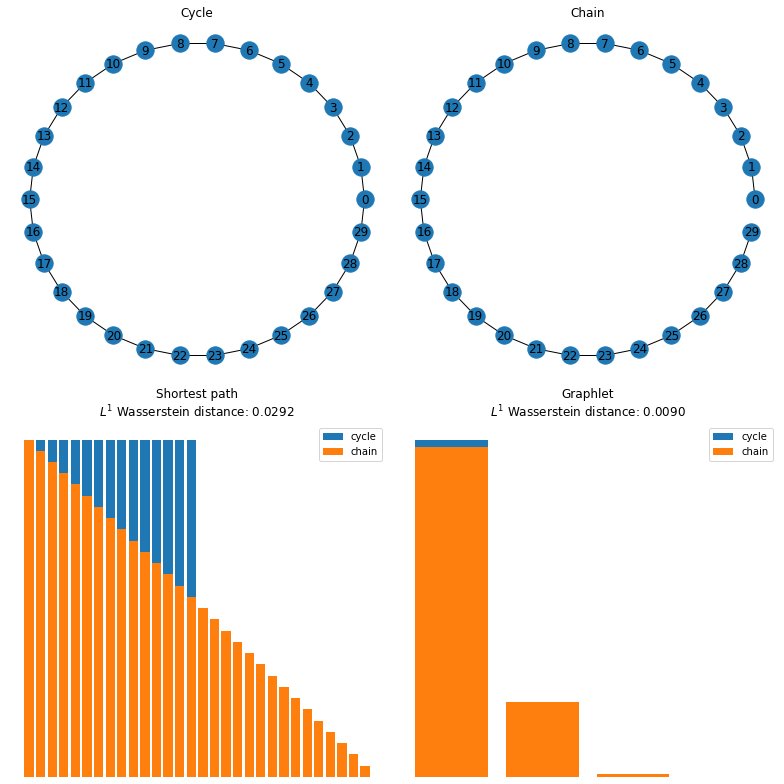

In [5]:
fig, axes = plt.subplots(figsize=(11, 11), nrows=2, ncols=2)

# save layout
pos = nx.shell_layout(cycle)

ax = axes[0, 0]
nx.draw_networkx(cycle, pos=pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')
    
ax = axes[0, 1]
nx.draw_networkx(chain, pos=pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')

ax = axes[1, 0]
ax.bar(range(1, len(emb_sp_cycle)+1), emb_sp_cycle, label='cycle')
ax.bar(range(1, len(emb_sp_chain)+1), emb_sp_chain, label='chain')
ax.set_title('Shortest path\n$L^1$ Wasserstein distance: {:.4f}'.format(wasserstein_distance(emb_sp_chain, emb_sp_cycle)))
ax.legend(loc='upper right')
ax.axis('off')

ax = axes[1, 1]
ax.bar(range(1, len(emb_g_cycle)+1), emb_g_cycle, label='cycle')
ax.bar(range(1, len(emb_g_chain)+1), emb_g_chain, label='chain')
ax.set_title('Graphlet\n$L^1$ Wasserstein distance: {:.4f}'.format(wasserstein_distance(emb_g_chain, emb_g_cycle)))
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('graph_kernels_chain_cycle.eps')